In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from venn import venn

In [8]:
df = pd.read_csv('../dataset/sources_commits.csv')
df

,vuln_id,cwe_id,score,chain,dataset,summary,published_date,chain_len,project,commit_href,commit_sha,patch
0,GHSA-mq5c-prh3-3f3h,NaN,NaN,{'https://github.com/tensorflow/tensorflow/com...,osv,Invalid validation in `QuantizeAndDequantizeV2`,2021-05-21,1,https://github.com/tensorflow/tensorflow,https://github.com/tensorflow/tensorflow/commi...,c5b0d5f8ac19888e46ca14b0e27562e7fbbee9a9,SINGLE
1,GHSA-h6wf-hvwc-fm77,NaN,NaN,{'https://github.com/chakra-core/ChakraCore/co...,osv,Out-of-bounds write,2021-03-29,2,https://github.com/chakra-core/ChakraCore,https://github.com/chakra-core/ChakraCore/comm...,d797e3f00e34c12c8c0ae52f56344325439dccd7,MULTI
2,GHSA-h6wf-hvwc-fm77,NaN,NaN,{'https://github.com/chakra-core/ChakraCore/co...,osv,Out-of-bounds write,2021-03-29,2,https://github.com/chakra-core/ChakraCore,https://github.com/chakra-core/ChakraCore/comm...,d85b5025b047f10784c53c6c1dd771775d417f5f,MULTI
3,GHSA-qg48-85hg-mqc5,NaN,NaN,{'https://github.com/tensorflow/tensorflow/com...,osv,Division by 0 in `DenseCountSparseOutput`,2021-05-21,1,https://github.com/tensorflow/tensorflow,https://github.com/tensorflow/tensorflow/commi...,da5ff2daf618591f64b2b62d9d9803951b945e9f,SINGLE
4,GHSA-2ccx-2gf3-8xvv,NaN,NaN,{'https://github.com/getkirby-v2/panel/commit/...,osv,.dev domains and some reverse proxy setups wer...,2021-01-14,1,https://github.com/getkirby-v2/panel,https://github.com/getkirby-v2/panel/commit/7f...,7f9ac1876bacb89fd8f142f5e561a02ebb725baa,SINGLE
...,...,...,...,...,...,...,...,...,...,...,...,...
11799,CVE-2010-4802,{'CWE-20'},10.0,{'https://github.com/kraih/mojo/commit/b3a1fb4...,cve_details,Commands.pm in Mojolicious before 0.999928 doe...,2011-05-03,2,https://github.com/kraih/mojo,https://github.com/kraih/mojo/commit/b3a1fb453...,b3a1fb453eda447c0bb082cd9eed81bb75a7564a,MULTI
11800,CVE-2010-4802,{'CWE-20'},10.0,{'https://github.com/kraih/mojo/commit/b3a1fb4...,cve_details,Commands.pm in Mojolicious before 0.999928 doe...,2011-05-03,2,https://github.com/kraih/mojo,https://github.com/kraih/mojo/commit/aa7c8da54...,aa7c8da54b1ebd4ccb64aa66dede7b7cdb381c44,MULTI
11801,CVE-2010-4335,{'CWE-20'},7.5,{'https://github.com/cakephp/cakephp/commit/e4...,cve_details,The _validatePost function in libs/controller/...,2011-01-14,1,https://github.com/cakephp/cakephp,https://github.com/cakephp/cakephp/commit/e431...,e431e86aa4301ced4273dc7919b59362cbb353cb,SINGLE
11802,CVE-2010-3260,{'CWE-264'},6.4,{'https://github.com/orbeon/orbeon-forms/commi...,cve_details,oxf/xml/xerces/XercesSAXParserFactoryImpl.java...,2011-04-27,1,https://github.com/orbeon/orbeon-forms,https://github.com/orbeon/orbeon-forms/commit/...,aba6681660f65af7f1676434da68c10298c30200,SINGLE


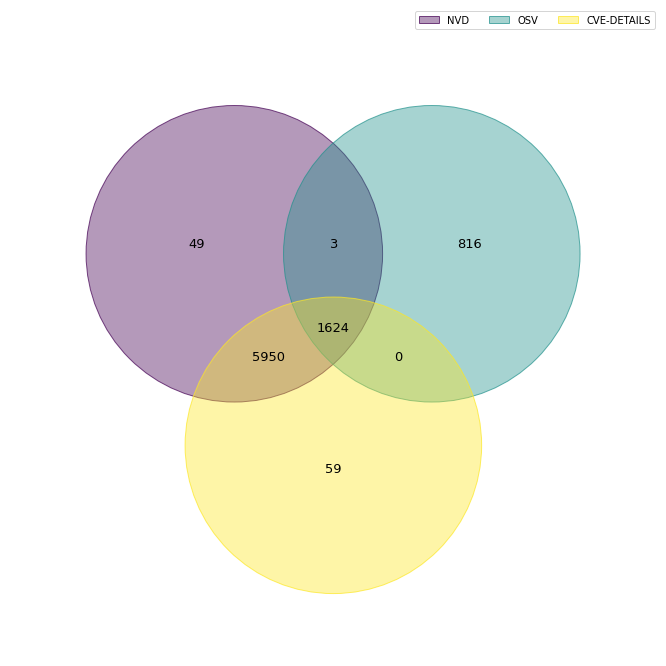

In [29]:
labels = ['NVD', 'OSV', 'CVE-DETAILS']

sets = {
    labels[0]: set(list(df[df['dataset'] == 'nvd']['commit_href'])),
    labels[1]: set(list(df[df['dataset'] == 'osv']['commit_href'])),
    labels[2]: set(list(df[df['dataset'] == 'cve_details']['commit_href']))
}

fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)
plt.legend(labels, ncol=3)

In [30]:
f"{len(df)} commits"

'20814 commits'

In [31]:
df[(df['dataset'] == 'cve_details') & (pd.notnull(df['score']))]

,vuln_id,cwe_id,score,chain,dataset,summary,published_date,chain_len,project,commit_href,patch
12705,CVE-2008-5619,{'CWE-94'},10.0,{'https://github.com/PHPMailer/PHPMailer/commi...,cve_details,html2text.php in Chuggnutt HTML to Text Conver...,2008-12-17,1,https://github.com/PHPMailer/PHPMailer,https://github.com/PHPMailer/PHPMailer/commit/...,SINGLE
12706,CVE-2008-5189,{'CWE-352'},5.0,{'https://github.com/rails/rails/commit/7282ed...,cve_details,CRLF injection vulnerability in Ruby on Rails ...,2008-11-21,1,https://github.com/rails/rails,https://github.com/rails/rails/commit/7282ed86...,SINGLE
12707,CVE-2020-35848,{'CWE-89'},7.5,{'https://github.com/agentejo/cockpit/commit/2...,cve_details,Agentejo Cockpit before 0.11.2 allows NoSQL in...,2020-12-30,3,https://github.com/agentejo/cockpit,https://github.com/agentejo/cockpit/commit/2a3...,MULTI
12708,CVE-2020-35848,{'CWE-89'},7.5,{'https://github.com/agentejo/cockpit/commit/2...,cve_details,Agentejo Cockpit before 0.11.2 allows NoSQL in...,2020-12-30,3,https://github.com/agentejo/cockpit,https://github.com/agentejo/cockpit/commit/79f...,MULTI
12709,CVE-2020-35848,{'CWE-89'},7.5,{'https://github.com/agentejo/cockpit/commit/2...,cve_details,Agentejo Cockpit before 0.11.2 allows NoSQL in...,2020-12-30,3,https://github.com/agentejo/cockpit,https://github.com/agentejo/cockpit/commit/33e...,MULTI
...,...,...,...,...,...,...,...,...,...,...,...
20809,CVE-2010-4802,{'CWE-20'},10.0,{'https://github.com/kraih/mojo/commit/aa7c8da...,cve_details,Commands.pm in Mojolicious before 0.999928 doe...,2011-05-03,2,https://github.com/kraih/mojo,https://github.com/kraih/mojo/commit/aa7c8da54...,MULTI
20810,CVE-2010-4802,{'CWE-20'},10.0,{'https://github.com/kraih/mojo/commit/aa7c8da...,cve_details,Commands.pm in Mojolicious before 0.999928 doe...,2011-05-03,2,https://github.com/kraih/mojo,https://github.com/kraih/mojo/commit/b3a1fb453...,MULTI
20811,CVE-2010-4335,{'CWE-20'},7.5,{'https://github.com/cakephp/cakephp/commit/e4...,cve_details,The _validatePost function in libs/controller/...,2011-01-14,1,https://github.com/cakephp/cakephp,https://github.com/cakephp/cakephp/commit/e431...,SINGLE
20812,CVE-2010-3260,{'CWE-264'},6.4,{'https://github.com/orbeon/orbeon-forms/commi...,cve_details,oxf/xml/xerces/XercesSAXParserFactoryImpl.java...,2011-04-27,1,https://github.com/orbeon/orbeon-forms,https://github.com/orbeon/orbeon-forms/commit/...,SINGLE


In [32]:
df[(df['dataset'] == 'nvd')]

,vuln_id,cwe_id,score,chain,dataset,summary,published_date,chain_len,project,commit_href,patch
4604,CVE-2021-20230,NaN,2.9,{'https://github.com/mtrojnar/stunnel/commit/e...,nvd,"A flaw was found in stunnel before 5.57, where...",2021-02-23,1,https://github.com/mtrojnar/stunnel,https://github.com/mtrojnar/stunnel/commit/eba...,SINGLE
4605,CVE-2021-20271,NaN,6.4,{'https://github.com/rpm-software-management/r...,nvd,A flaw was found in RPM's signature check func...,2021-03-26,1,https://github.com/rpm-software-management/rpm,https://github.com/rpm-software-management/rpm...,SINGLE
4606,CVE-2021-21234,NaN,2.9,{'https://github.com/lukashinsch/spring-boot-a...,nvd,spring-boot-actuator-logview in a library that...,2021-01-05,2,https://github.com/lukashinsch/spring-boot-act...,https://github.com/lukashinsch/spring-boot-act...,MULTI
4607,CVE-2021-21234,NaN,2.9,{'https://github.com/lukashinsch/spring-boot-a...,nvd,spring-boot-actuator-logview in a library that...,2021-01-05,2,https://github.com/lukashinsch/spring-boot-act...,https://github.com/lukashinsch/spring-boot-act...,MULTI
4608,CVE-2021-21235,NaN,2.9,{'https://github.com/kamadak/exif-rs/commit/f2...,nvd,kamadak-exif is an exif parsing library writte...,2021-01-06,1,https://github.com/kamadak/exif-rs,https://github.com/kamadak/exif-rs/commit/f21d...,SINGLE
...,...,...,...,...,...,...,...,...,...,...,...
12700,CVE-2022-23837,NaN,2.9,{'https://github.com/mperham/sidekiq/commit/77...,nvd,"In api.rb in Sidekiq before 6.4.0, there is no...",2022-01-21,1,https://github.com/mperham/sidekiq,https://github.com/mperham/sidekiq/commit/7785...,SINGLE
12701,CVE-2022-23857,NaN,2.9,{'https://github.com/navidrome/navidrome/commi...,nvd,model/criteria/criteria.go in Navidrome before...,2022-01-24,1,https://github.com/navidrome/navidrome,https://github.com/navidrome/navidrome/commit/...,SINGLE
12702,CVE-2022-23935,NaN,6.4,{'https://github.com/exiftool/exiftool/commit/...,nvd,lib/Image/ExifTool.pm in ExifTool before 12.38...,2022-01-25,1,https://github.com/exiftool/exiftool,https://github.com/exiftool/exiftool/commit/74...,SINGLE
12703,CVE-2022-23993,NaN,6.4,{'https://github.com/pfsense/pfsense/commit/5d...,nvd,/usr/local/www/pkg.php in pfSense through 2.5....,2022-01-26,1,https://github.com/pfsense/pfsense,https://github.com/pfsense/pfsense/commit/5d82...,SINGLE


In [37]:
df = df.drop_duplicates(['vuln_id', 'commit_href'], keep='last')
f"{len(df)} commits (after deleting duplicates)"

'11814 commits (after deleting duplicates)'

In [34]:
df.tail()

,vuln_id,cwe_id,score,chain,dataset,summary,published_date,chain_len,project,commit_href,patch
20809,CVE-2010-4802,{'CWE-20'},10.0,{'https://github.com/kraih/mojo/commit/aa7c8da...,cve_details,Commands.pm in Mojolicious before 0.999928 doe...,2011-05-03,2,https://github.com/kraih/mojo,https://github.com/kraih/mojo/commit/aa7c8da54...,MULTI
20810,CVE-2010-4802,{'CWE-20'},10.0,{'https://github.com/kraih/mojo/commit/aa7c8da...,cve_details,Commands.pm in Mojolicious before 0.999928 doe...,2011-05-03,2,https://github.com/kraih/mojo,https://github.com/kraih/mojo/commit/b3a1fb453...,MULTI
20811,CVE-2010-4335,{'CWE-20'},7.5,{'https://github.com/cakephp/cakephp/commit/e4...,cve_details,The _validatePost function in libs/controller/...,2011-01-14,1,https://github.com/cakephp/cakephp,https://github.com/cakephp/cakephp/commit/e431...,SINGLE
20812,CVE-2010-3260,{'CWE-264'},6.4,{'https://github.com/orbeon/orbeon-forms/commi...,cve_details,oxf/xml/xerces/XercesSAXParserFactoryImpl.java...,2011-04-27,1,https://github.com/orbeon/orbeon-forms,https://github.com/orbeon/orbeon-forms/commit/...,SINGLE
20813,CVE-1999-0731,NaN,4.6,{'https://github.com/KDE/kde1-kdebase/commit/0...,cve_details,The KDE klock program allows local users to un...,1999-06-23,1,https://github.com/KDE/kde1-kdebase,https://github.com/KDE/kde1-kdebase/commit/049...,SINGLE


In [ ]:
df.df_tpc